In [2]:
import uproot
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from energy_function import *
from getS50 import *
from draw_compare_multiply import draw_compare_multiply


In [3]:
test_size = 0.4
savepath = "./fig/energy_reconstruction/"


In [4]:
file = uproot.open("/home2/chenxu/data/gamma_all.root")


In [5]:
data = file["asresult"].arrays(["nch", "theta", "phi", "sigma", "cx", "cy", "sumpf",
                               "summd", "mr1", "ne", "age", "pritheta", "priphi", "prie", "inout"], library="np")


In [6]:
data["cr"] = np.sqrt(data["cx"]**2+data["cy"]**2)


In [15]:
nch = data["nch"]
theta = data["theta"]
phi = data["phi"]
sigma = data["sigma"]
cx = data["cx"]
cy = data["cy"]
cr = data["cr"]
sumpf = data["sumpf"]
summd = data["summd"]
mr1 = data["mr1"]
ne = data["ne"]
age = data["age"]
pritheta = np.rad2deg(data["pritheta"])
priphi = data["priphi"]
prie = data["prie"]
inout = data["inout"]
S50 = getS50(ne, age)


In [16]:
priphi = 180-np.rad2deg(priphi)
priphi[priphi>180] = priphi[priphi>180]-360

In [7]:
cuted = np.where((theta < 40) & (nch >= 16) & (
    inout == 1) & (age > 0.31) & (age < 1.59))


In [8]:
nch = nch[cuted]
theta = theta[cuted]
phi = phi[cuted]
sigma = sigma[cuted]
cx = cx[cuted]
cy = cy[cuted]
sumpf = sumpf[cuted]
summd = summd[cuted]
mr1 = mr1[cuted]
ne = ne[cuted]
age = age[cuted]
pritheta = pritheta[cuted]
priphi = priphi[cuted]
prie = prie[cuted]/1000
inout = inout[cuted]
S50 = S50[cuted]
sectheta = 1/np.cos(np.deg2rad(theta))


In [9]:
train_index, test_index = train_test_split(
    range(nch.shape[0]), test_size=test_size, shuffle=True, random_state=42)


In [10]:
nch_train = nch[train_index]
theta_train = theta[train_index]
phi_train = phi[train_index]
sigma_train = sigma[train_index]
cx_train = cx[train_index]
cy_train = cy[train_index]
sumpf_train = sumpf[train_index]
summd_train = summd[train_index]
mr1_train = mr1[train_index]
ne_train = ne[train_index]
age_train = age[train_index]
pritheta_train = pritheta[train_index]
priphi_train = priphi[train_index]
prie_train = prie[train_index]
inout_train = inout[train_index]
S50_train = S50[train_index]
sectheta_train = sectheta[train_index]

nch_test = nch[test_index]
theta_test = theta[test_index]
phi_test = phi[test_index]
sigma_test = sigma[test_index]
cx_test = cx[test_index]
cy_test = cy[test_index]
sumpf_test = sumpf[test_index]
summd_test = summd[test_index]
mr1_test = mr1[test_index]
ne_test = ne[test_index]
age_test = age[test_index]
pritheta_test = pritheta[test_index]
priphi_test = priphi[test_index]
prie_test = prie[test_index]
inout_test = inout[test_index]
S50_test = S50[test_index]
sectheta_test = sectheta[test_index]


In [13]:
train_dict = {"nch": nch_train, "sectheta": sectheta_train, "S50": S50_train, "cx": cx_train, "cy": cy_train,
              "ne": ne_train, "age": age_train, "sumpf": sumpf_train, "summd": summd_train, "mr1": mr1_train, "energy": prie_train, "log_energy": np.log10(prie_train)}
pd_data = pd.DataFrame(train_dict)
pd_data.to_csv("MC_train_AllSky_Data.csv", index=False)

test_dict = {"nch": nch_test, "sectheta": sectheta_test, "S50": S50_test, "cx": cx_test, "cy": cy_test,
             "ne": ne_test, "age": age_test, "sumpf": sumpf_test, "summd": summd_test, "mr1": mr1_test, "energy": prie_test, "log_energy": np.log10(prie_test)}
pd_data = pd.DataFrame(test_dict)
pd_data.to_csv("MC_test_AllSky_Data.csv", index=False)


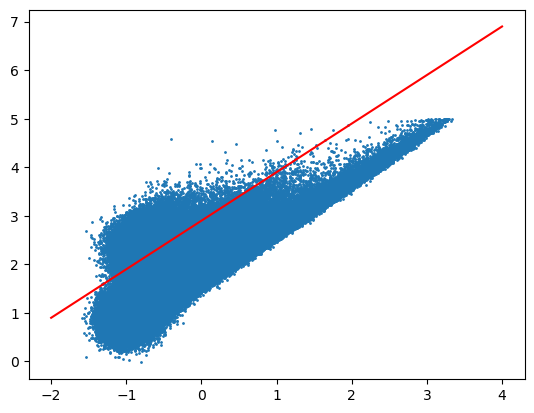

In [14]:
plt.scatter(np.log10(S50), np.log10(prie), s=1)
x = np.linspace(-2, 4, 10)
y = x+2.9
plt.plot(x, y, c="r")


In [15]:
parameter_list = ["nch", "theta", "phi", "sigma", "cx", "cy", "cr", "sumpf",
                  "summd", "mr1", "ne", "age", "pritheta", "priphi", "prie", "inout"]
for para in parameter_list:
    datalist = [data[para][cuted][np.where(np.log10(prie) <= np.log10(S50)+2.9)], data[para][cuted][np.where(np.log10(prie) > np.log10(
        S50)+2.9)]]
    legendlist = ["normal", "error"]
    for binsnumber in [10, 20, 30, 40]:
        for if_logx in [0, 1]:
            for if_logy in [0, 1]:
                draw_compare_multiply(datalist, legendlist, paraname=para,
                                      bins_number=binsnumber, if_logx=if_logx, if_logy=if_logy, savepath=f"/home2/hky/github/Gamma_Energy/AllSky/fig/checkerror/{para}", savename=f"{para}_{binsnumber}_{if_logx}_{if_logy}.png")


nch_10_0_0.png
nch_10_0_1.png
nch_10_1_0.png
nch_10_1_1.png
nch_20_0_0.png
nch_20_0_1.png
nch_20_1_0.png
nch_20_1_1.png
nch_30_0_0.png
nch_30_0_1.png
nch_30_1_0.png
nch_30_1_1.png
nch_40_0_0.png
nch_40_0_1.png
nch_40_1_0.png
nch_40_1_1.png
theta_10_0_0.png
theta_10_0_1.png
theta_10_1_0.png
theta_10_1_1.png
theta_20_0_0.png
theta_20_0_1.png
theta_20_1_0.png
theta_20_1_1.png
theta_30_0_0.png
theta_30_0_1.png
theta_30_1_0.png
theta_30_1_1.png
theta_40_0_0.png
theta_40_0_1.png
theta_40_1_0.png
theta_40_1_1.png
phi_10_0_0.png
phi_10_0_1.png
phi_20_0_0.png
phi_20_0_1.png
phi_30_0_0.png
phi_30_0_1.png
phi_40_0_0.png
phi_40_0_1.png
sigma_10_0_0.png
sigma_10_0_1.png
sigma_10_1_0.png
sigma_10_1_1.png


/home2/hky/github/Gamma_Energy/AllSky/draw_compare_multiply.py:85: RuntimeWarning: invalid value encountered in divide
  counts_data / np.sum(counts_data) /
/home2/hky/github/Gamma_Energy/AllSky/draw_compare_multiply.py:87: RuntimeWarning: invalid value encountered in divide
  yerr=np.sqrt(counts_data)
/home2/hky/github/Gamma_Energy/AllSky/draw_compare_multiply.py:85: RuntimeWarning: divide by zero encountered in divide
  counts_data / np.sum(counts_data) /
/home2/hky/github/Gamma_Energy/AllSky/draw_compare_multiply.py:87: RuntimeWarning: divide by zero encountered in divide
  yerr=np.sqrt(counts_data)
/home2/hky/miniconda3/envs/d2l/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


sigma_20_0_0.png
sigma_20_0_1.png
sigma_20_1_0.png
sigma_20_1_1.png
sigma_30_0_0.png
sigma_30_0_1.png
sigma_30_1_0.png
sigma_30_1_1.png
sigma_40_0_0.png
sigma_40_0_1.png
sigma_40_1_0.png
sigma_40_1_1.png
cx_10_0_0.png
cx_10_0_1.png
cx_20_0_0.png
cx_20_0_1.png
cx_30_0_0.png
cx_30_0_1.png
cx_40_0_0.png
cx_40_0_1.png
cy_10_0_0.png
cy_10_0_1.png
cy_20_0_0.png
cy_20_0_1.png
cy_30_0_0.png
cy_30_0_1.png
cy_40_0_0.png
cy_40_0_1.png
cr_10_0_0.png
cr_10_0_1.png
cr_10_1_0.png
cr_10_1_1.png
cr_20_0_0.png
cr_20_0_1.png
cr_20_1_0.png
cr_20_1_1.png
cr_30_0_0.png
cr_30_0_1.png
cr_30_1_0.png
cr_30_1_1.png
cr_40_0_0.png
cr_40_0_1.png
cr_40_1_0.png
cr_40_1_1.png
sumpf_10_0_0.png
sumpf_10_0_1.png
sumpf_10_1_0.png
sumpf_10_1_1.png
sumpf_20_0_0.png
sumpf_20_0_1.png
sumpf_20_1_0.png
sumpf_20_1_1.png
sumpf_30_0_0.png
sumpf_30_0_1.png
sumpf_30_1_0.png
sumpf_30_1_1.png
sumpf_40_0_0.png
sumpf_40_0_1.png
sumpf_40_1_0.png
sumpf_40_1_1.png
summd_10_0_0.png
summd_10_0_1.png
summd_10_1_0.png
summd_10_1_1.png
summd_20

/home2/hky/github/Gamma_Energy/AllSky/draw_compare_multiply.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  a1.set_xlim(bins_begin, bins_end)
/home2/hky/github/Gamma_Energy/AllSky/draw_compare_multiply.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  a0.set_xlim(bins_begin, bins_end)


inout_10_0_0.png
inout_10_0_1.png


/home2/hky/github/Gamma_Energy/AllSky/draw_compare_multiply.py:97: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  a1.set_xlim(10**bins_begin, 10**bins_end)
/home2/hky/github/Gamma_Energy/AllSky/draw_compare_multiply.py:98: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  a0.set_xlim(10**bins_begin, 10**bins_end)


inout_10_1_0.png
inout_10_1_1.png
inout_20_0_0.png
inout_20_0_1.png
inout_20_1_0.png
inout_20_1_1.png
inout_30_0_0.png
inout_30_0_1.png
inout_30_1_0.png
inout_30_1_1.png
inout_40_0_0.png
inout_40_0_1.png
inout_40_1_0.png
inout_40_1_1.png


# autogluon

In [16]:
from autogluon.tabular import TabularDataset, TabularPredictor
method = "autogluon"
tmpsavepath = os.path.join(savepath, method)
mkdir(tmpsavepath)


In [20]:
train_data_autogluon = TabularDataset("MC_train_AllSky_Data.csv")
time_limit = 8*60*60
predictor = TabularPredictor(label="log_energy").fit(train_data_autogluon.drop(
    columns=["energy"]),time_limit=time_limit, presets='best_quality')


Loaded data from: MC_train_AllSky_Data.csv | Columns = 12 / 12 | Rows = 1176186 -> 1176186
No path specified. Models will be saved in: "AutogluonModels/ag-20230318_055010/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 28800s
AutoGluon will save models to "AutogluonModels/ag-20230318_055010/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Debian 5.10.162-1 (2023-01-21)
Train Data Rows:    1176186
Train Data Columns: 10
Label Column: log_energy
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (4.998421793472894, 0.0406219907500906, 1.67294, 0.56332)
	If 'regression' is not the correct problem_type, please manually specify the pro

In [ ]:
test_data_autogluon = TabularDataset("MC_test_Data.csv")
energy_pred = 10**predictor.predict(test_data_autogluon.drop(
    columns=["energy", "log_energy"])).to_numpy()
energy_orgin = prie_test

check_fit(energy_pred, energy_orgin, method, tmpsavepath)

draw_precision()
np.save("precision.npy", precision)
